## 3 Operaciones con Imágenes

Las operaciones con imágenes es la implementación de operaciones aritméticas estándar, como suma, resta, multiplicación y división, en imágenes. Estas operaciones tiene muchos usos en el procesamiento de imágenes, Por ejemplo,la resta de imagen se puede utilizar para detectar diferencias entre dos o más imágenes de la misma escena u objeto.

### 3.1 Operaciones Básicas con Imágenes

La mayoria de operaciones con imagenes estan relacionadas principalmente con la liberia numpy en lugar de OpenCV. Se requiere de conocimientos basicos en su uso para poder entender y aplicar de mejor manera las operaciones.

#### 3.1.1 Acceso y Modificación de Pixeles

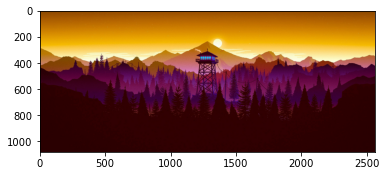

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread("ImgT2/Horizon Forest.jpg")
plt.imshow(img)

Acceso Puede acceder a un valor de píxel por sus coordenadas de fila y columna. Para la imagen BGR, devuelve una matriz de valores azules, verdes y rojos. Para la imagen en escala de grises, solo se devuelve la intensidad correspondiente entre 0 y 255 siendo 0 igual a negro y 255 equivalente a blanco.

In [3]:
# Accedemos al valor del pixel en sus 3 canales
px = img[100,100]
px

array([182, 102,   1], dtype=uint8)

In [4]:
# Accediendo al valor de un pixel en un solo canal canal B
px = img[100,100,0]
px

182

In [5]:
# Accediendo al valor de un pixel en un solo canal canal G
px = img[100,100,1]
px

102

In [6]:
# Accediendo al valor de un pixel en un solo canal canal R
px = img[100,100,2]
px

1

#### 3.1.2 Modificación

In [7]:
# Modificando valor de pixeles
img[100,100]=[255,255,255]
img[100,100]

array([255, 255, 255], dtype=uint8)

**Numpy** es una biblioteca o libreria optimizada para calculos rapidos de matrices. No se recomienda simplemente acceder a cada valor de pixel de las formas ya vistas y modificarlos, porque seria un proceso muy lento. Estos metodos se usan para seleccionar una region de una matriz, supongamos las 5 primeras filas y las ultimas 3 columnas de la forma que la veremos a continuación

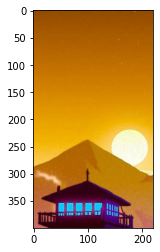

In [8]:
img2 = img[:400, 1180:1400]
plt.imshow(img2)

**Metodos item() y itemset()** Para el acceso individual de píxeles, los métodos de Numpy, array.item () y array.itemset () se consideran mejores. Sin embargo, siempre devuelven un escalar, por lo que si desea acceder a todos los valores B, G, R, deberá llamar a array.item () por separado para cada valor.

In [9]:
# Accediendo
img.item(50,50,2)

3

In [10]:
# Modificando
img.itemset((50,50,2),100)
img.item(50,50,2)

100

#### 3.1.3 Acediendo a las Propiedades de la Imagen
Las Imagenes poseen propiedades como numero de filas, numero de columnas, numero de pixeles, tipo de dato
#### 3.1.4 Metodo shape

In [11]:
img.shape

(1080, 2560, 3)

#### 3.1.4 Metodo dtype

In [12]:
img.dtype

dtype('uint8')

In [13]:
type(img)

numpy.ndarray

In [14]:
img.size

8294400

### 3.2 ROI de una imagen

A veces, tendrás que jugar con ciertas regiones de imágenes. Para la detección de ojos en imágenes, la detección de la primera cara se realiza sobre toda la imagen. Cuando se obtiene una cara, seleccionamos solo la región de la cara y buscamos ojos dentro de ella en lugar de buscar en toda la imagen. Mejora la precisión (porque los ojos siempre están en las caras) y el rendimiento (porque buscamos en un área pequeña) El ROI lo podemos obtener utilizando la indexacion antes vista, en este ejemplo seleccionaremos la pelota y la copiaremos en otro lugar de la imagen:

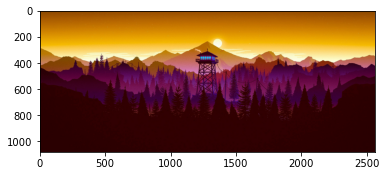

In [15]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread("ImgT2/Horizon Forest.jpg")
plt.imshow(img)

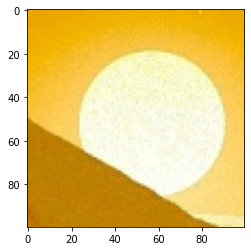

In [16]:
# extraer la region de interes
sol = img[200:300,1300:1400]
plt.imshow(sol)

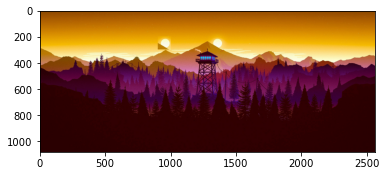

In [17]:
img[200:300, 900:1000]=sol
plt.imshow(img)

### División y Fusión de Canales

A veces necesitará trabajar por separado en los canales B, G, R de una imagen. En este caso, debe dividir la imagen BGR en canales individuales. En otros casos, es posible que deba unirse a estos canales individuales para crear una imagen BGR

#### 3.3.1 split()

In [18]:
# split() nos permite dividir los canales de una imagen
b,g,r = cv.split(img)

Text(0.5, 1.0, 'Blue Channel')

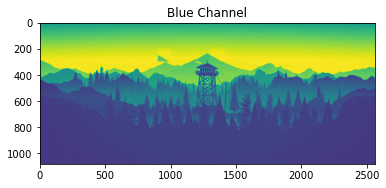

In [19]:
plt.imshow(b)
plt.title("Blue Channel")

Text(0.5, 1.0, 'Green Channel')

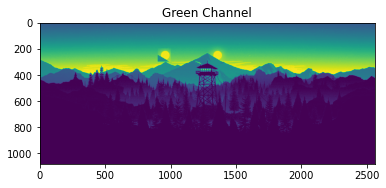

In [20]:
plt.imshow(g)
plt.title("Green Channel")

Text(0.5, 1.0, 'Red Channel')

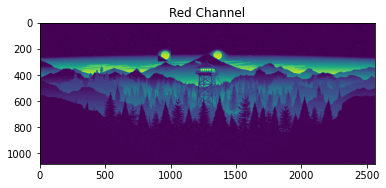

In [21]:
plt.imshow(r)
plt.title("Red Channel")

#### 3.3.2 merge()

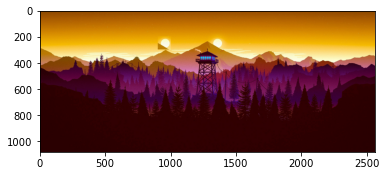

In [22]:
# merge() permite unir los canales de una imagen
img_unida = cv.merge((b,g,r))
plt.imshow(img_unida)

(<matplotlib.image.AxesImage at 0x184fcfa8be0>, Text(0.5, 1.0, 'Blue Channel'))

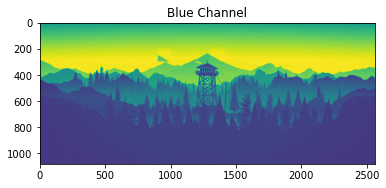

In [25]:
channel_blue = img[:,:,0]
plt.imshow(channel_blue), plt.title("Blue Channel")

(<matplotlib.image.AxesImage at 0x184fd157250>, Text(0.5, 1.0, 'Blue Channel'))

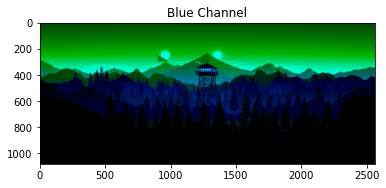

In [26]:
img[:,:,0]=0
plt.imshow(img), plt.title("Blue Channel")

### 3.4 Operaciones Aritmeticas con Imagenes

#### 3.4.1 Mescla de Imagenes

Esto también es una adición de imagen, pero se otorgan diferentes pesos a las imágenes para dar una sensación de fusión o transparencia. Aquí tomé dos imágenes para mezclarlas. La primera imagen tiene un peso de 0.7 y la segunda imagen tiene 0.3.

In [31]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread("ImgT2/snort.png")
img2 = cv.imread("ImgT2/wpp1.png")

# cambio de espacio de color
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

# igualar el tamano
fil,cols,chan = img1.shape
img2 = cv.resize(img2,(cols,fil))

Text(0.5, 1.0, 'Nimbus')

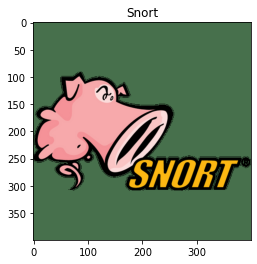

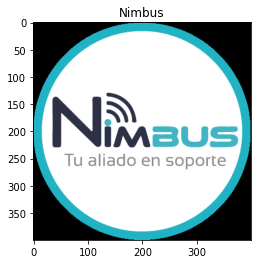

In [33]:
#Mostramos las imagenes
plt.figure(1)
plt.imshow(img1)
plt.title("Snort")
plt.figure(2)
plt.imshow(img2)
plt.title("Nimbus")

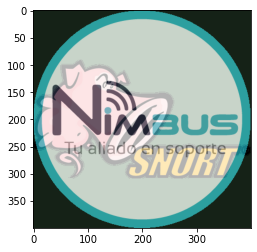

In [34]:
#combinar imagenes
img_out = cv.addWeighted(img1,0.3,img2,0.7,0)
plt.imshow(img_out)

### 3.5 Operaciones bit a bit

Esto incluye las operaciones bit a bit AND, OR, NOT y XOR. Serán muy útiles al extraer cualquier parte de la imagen (como iremos viendo al transcurso de este aprendisaje), definir y trabajar con ROI no rectangulares, etc. A continuación veremos un ejemplo de cómo cambiar una región particular de una imagen.

Quiero poner el logotipo de OpenCV sobre una imagen. Si agrego dos imágenes, cambiará el color. Si los mezclo, obtengo un efecto transparente. Pero quiero que sea opaco. Si fuera una región rectangular, podría usar el ROI como lo hicimos en el último capítulo. Pero el logotipo de OpenCV no es una forma rectangular. Entonces puede hacerlo con operaciones bit a bit como se muestra a continuación:

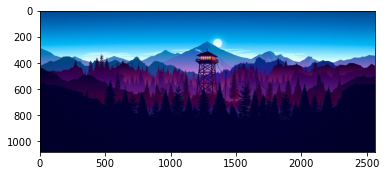

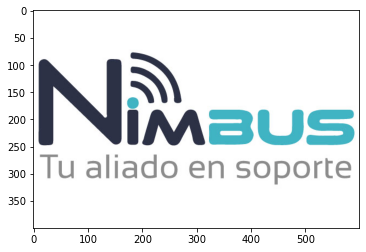

In [36]:
#immportamos las librerias
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# cargar nuestras imagenes
img1 = cv.imread('ImgT2/Horizon Forest.jpg')
img2 = cv.imread('ImgT2/02.jpg')

# cambiando espacio de color
forest = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
nimbus = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

# mostrado las imagenes leidas
plt.figure(1)
plt.imshow(forest)
plt.figure(2)
plt.imshow(nimbus)

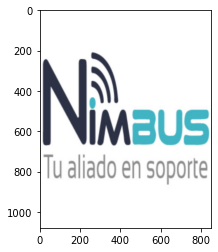

In [45]:
# cambiamos el tamano de imagen
fil,col,_ = forest.shape
fil2,col2,_ = nimbus.shape
nimbus = cv.resize(nimbus,(col//3,fil))
plt.imshow(nimbus)

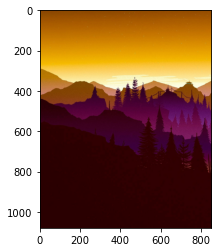

In [46]:
fil, col,_ =nimbus.shape
roi = img1[0:fil,0:col]
plt.imshow(roi)

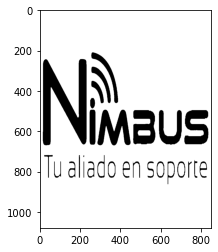

In [47]:
# creamos una mascara del logotipo
nimbus_gray = cv.cvtColor(nimbus, cv.COLOR_RGB2GRAY)
ret,mask = cv.threshold(nimbus_gray, 150,255, cv.THRESH_BINARY)
plt.imshow(mask, cmap="gray")

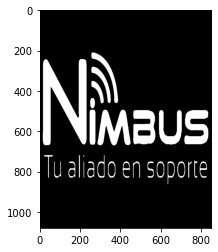

In [48]:
# Creamos una mascara invertida
mask_inv = cv.bitwise_not(mask)
plt.imshow(mask_inv, cmap="gray")

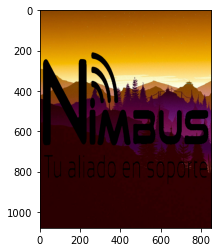

In [49]:
# tomamos el roi menos la mascara
img1_bg = cv.bitwise_and(roi,roi,mask = mask)
plt.imshow(img1_bg)

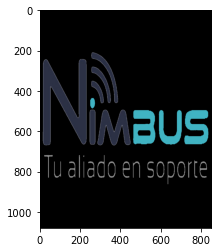

In [50]:
#tomamos region de intere del logotipo opencv
img2_bg = cv.bitwise_and(nimbus,nimbus,mask=mask_inv)
plt.imshow(img2_bg)

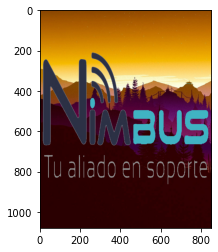

In [51]:
img = img1_bg + img2_bg
plt.imshow(img)

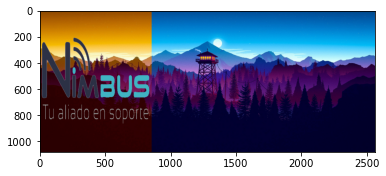

In [52]:
forest[0:fil,0:col]=img
plt.imshow(forest)

## 4 Procesamiento de Imagenes

### 4.1 Cambio de Espacio de Color de las Imagenes

En la visión por computadora y el procesamiento de imágenes, el espacio de color se refiere a una forma específica de organizar los colores. Un espacio de color es en realidad una combinación de dos cosas, un modelo de color y una función de mapeo. La razón por la que queremos modelos de color es porque nos ayuda a representar valores de píxeles usando tuplas. La función de mapeo asigna el modelo de color al conjunto de todos los colores posibles que se pueden representar. Hay muchos
espacios de color diferentes que son útiles. Algunos de los espacios de color más populares son RGB, YUV, HSV, Lab, etc. Diferentes espacios de color ofrecen diferentes ventajas. Solo tenemos que elegir el espacio de color adecuado para el problema dado. Tomemos un par de espacios de
color y veamos qué información proporcionan:

**RGB:** Probablemente el espacio de color más popular. Es sinónimo de rojo, verde y azul. En este espacio de color, cada color se representa como una combinación ponderada de rojo, verde y azul. Por lo tanto, cada valor de píxel se representa como una tupla de tres números correspondientes a rojo, verde y azul. Cada valor oscila entre 0 y 255.

(<matplotlib.image.AxesImage at 0x18485b2bf40>,
 Text(0.5, 1.0, 'Imagen Original'))

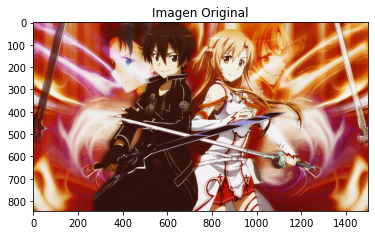

In [53]:
# importamos librerias
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread("ImgT2/01.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img),plt.title("Imagen Original")

(<matplotlib.image.AxesImage at 0x184fd3f0820>, Text(0.5, 1.0, 'Red'))

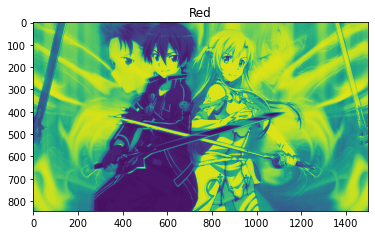

In [54]:
plt.imshow(img[:,:,0]),plt.title("Red")

(<matplotlib.image.AxesImage at 0x1848296e310>, Text(0.5, 1.0, 'Green'))

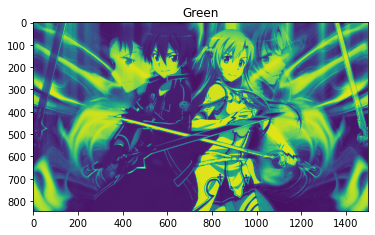

In [55]:
plt.imshow(img[:,:,1]),plt.title("Green")

(<matplotlib.image.AxesImage at 0x18484f4f2b0>, Text(0.5, 1.0, 'Blue'))

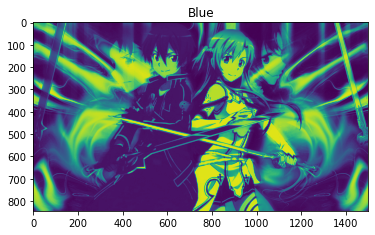

In [56]:
plt.imshow(img[:,:,2]),plt.title("Blue")

**YUV:** Aunque RGB es bueno para muchos propósitos, tiende a ser muy limitado para muchas aplicaciones de la vida real. La gente comenzó a pensar en diferentes métodos para separar la información de intensidad, de la información de color. Por lo tanto, se les ocurrió el espacio de
color YUV. Y se refiere a la luminancia o intensidad, y los canales U / V representan información de color. Esto funciona bien en muchas aplicaciones porque el sistema visual humano percibe la información de intensidad de manera muy diferente a la información de color.

(<matplotlib.image.AxesImage at 0x18485b4f610>,
 Text(0.5, 1.0, 'Imagen Original'))

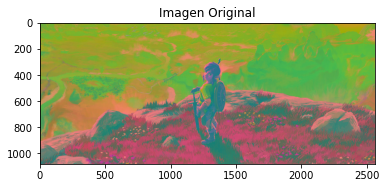

In [57]:
# importamos librerias
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread("ImgT2/Legends of Zelda.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2YUV)
plt.imshow(img),plt.title("Imagen Original")

(<matplotlib.image.AxesImage at 0x18485ba1a00>, Text(0.5, 1.0, 'Luminosidad'))

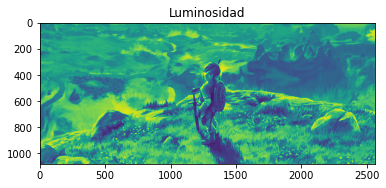

In [58]:
plt.imshow(img[:,:,0]),plt.title("Luminosidad")

(<matplotlib.image.AxesImage at 0x18485eb00d0>, Text(0.5, 1.0, 'U'))

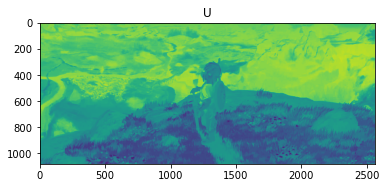

In [59]:
plt.imshow(img[:,:,1]),plt.title("U")

(<matplotlib.image.AxesImage at 0x184877bb8b0>, Text(0.5, 1.0, 'V'))

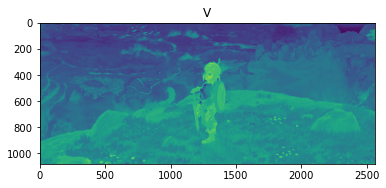

In [60]:
plt.imshow(img[:,:,2]),plt.title("V")

**HSV:** Al final resultó que, incluso YUV todavía no era lo suficientemente bueno para algunos aplicaciones. Entonces la gente comenzó a pensar en cómo los humanos perciben el color, y se les
ocurrió el espacio de color HSV. HSV significa Hue, Saturación y Valor(Matiz, Saturacion, Valor). Este es un sistema cilíndrico donde separamos tres de las propiedades más primarias de los colores y las representamos usando diferentes canales. Esto está estrechamente relacionado con la forma en que el sistema visual humano comprende el color. Esto nos da mucha flexibilidad en cuanto a cómo podemos manejar las imágenes.

(<matplotlib.image.AxesImage at 0x1848654b340>,
 Text(0.5, 1.0, 'Imagen Original'))

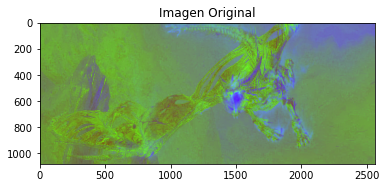

In [61]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread("ImgT2/Magic Flyer.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
plt.imshow(img),plt.title("Imagen Original")

(<matplotlib.image.AxesImage at 0x1848659b730>, Text(0.5, 1.0, 'Canal Hue'))

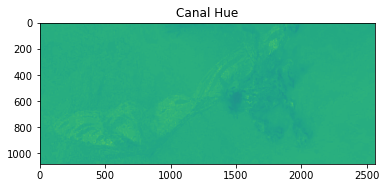

In [62]:
plt.imshow(img[:,:,0]),plt.title("Canal Hue")

(<matplotlib.image.AxesImage at 0x1848689ce80>,
 Text(0.5, 1.0, 'Canal Saturación'))

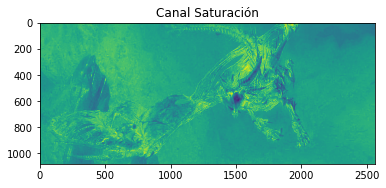

In [63]:
plt.imshow(img[:,:,1]),plt.title("Canal Saturación")

(<matplotlib.image.AxesImage at 0x18486ba8550>, Text(0.5, 1.0, 'Canal Valor'))

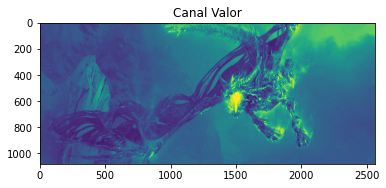

In [64]:
plt.imshow(img[:,:,2]),plt.title("Canal Valor")

## Tarea 2 

Realizar 3 ejercicios:

1> Fusión de imágenes con cv.addWeighted()
2> Extracción del roi (porción de una imagen) y ubicarla en otro lugar de la misma
3> Ejercicio con operaciones Bit a Bit como el visto en clase

### Ejercicio 1

Fusión de imágenes con cv.addWeighted()

Text(0.5, 1.0, 'Imagenes Fusionadas')

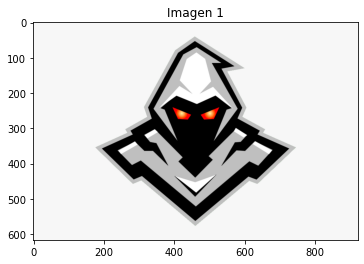

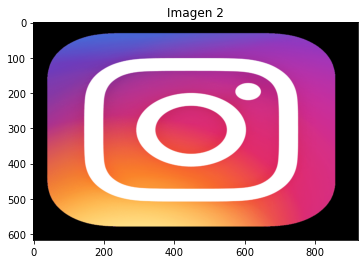

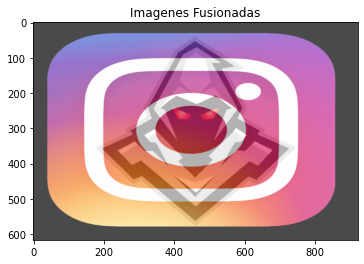

In [67]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread("ImgT2/01.png")
img2 = cv.imread("ImgT2/02.png")

# cambio de espacio de color
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

# igualar el tamano
fil,cols,chan = img1.shape
img2 = cv.resize(img2,(cols,fil))

#Mostramos las imagenes
plt.figure(1)
plt.imshow(img1)
plt.title("Imagen 1")
plt.figure(2)
plt.imshow(img2)
plt.title("Imagen 2")

#combinar imagenes
img_out = cv.addWeighted(img1,0.3,img2,0.7,0)
plt.figure(3)
plt.imshow(img_out)
plt.title("Imagenes Fusionadas")

### Ejercicio 2

Extracción del roi (porción de una imagen) y ubicarla en otro lugar de la misma

Text(0.5, 1.0, 'Nueva imagen')

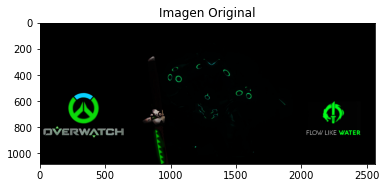

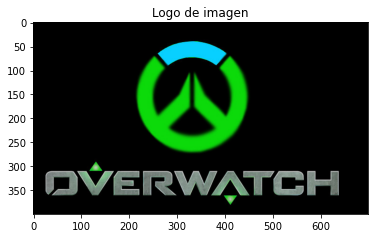

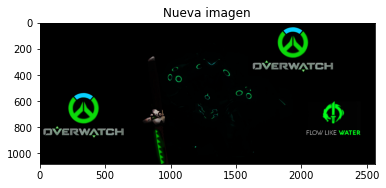

In [74]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread("ImgT2/Overwatch 3.jpg")
plt.figure(1)
plt.imshow(img)
plt.title("Imagen Original")

# extraer la region de interes
logo = img[500:900,:700]
plt.figure(2)
plt.imshow(logo)
plt.title("Logo de imagen")

# ubicar en otro lugar de la imagen
img[:400, 1600:2300]=logo
plt.figure(3)
plt.imshow(img)
plt.title("Nueva imagen")

### Ejercicio 3

Ejercicio con operaciones Bit a Bit como el visto en clase

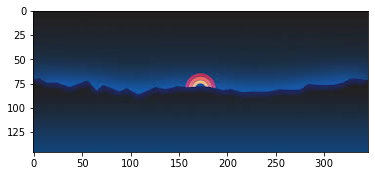

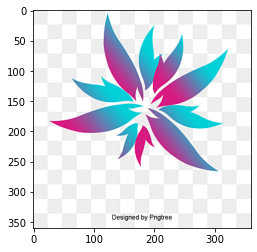

In [80]:
#immportamos las librerias
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# cargar nuestras imagenes
img1 = cv.imread('ImgT2/Rainbow.jpg')
img2 = cv.imread('ImgT2/03.jpg')

# cambiando espacio de color
noche = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
flor = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

# mostrado las imagenes leidas
plt.figure(1)
plt.imshow(noche)
plt.figure(2)
plt.imshow(flor)

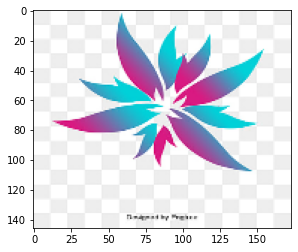

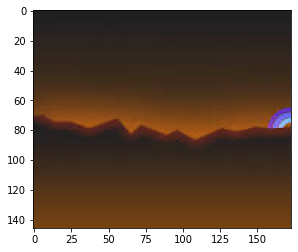

In [81]:
# cambiamos el tamano de imagen
fil,col,_ = noche.shape
fil2,col2,_ = flor.shape
flor = cv.resize(flor,(col//2, fil))
plt.figure(1)
plt.imshow(flor)

fil, col,_ =flor.shape
roi = img1[0:fil,0:col]
plt.figure(2)
plt.imshow(roi)

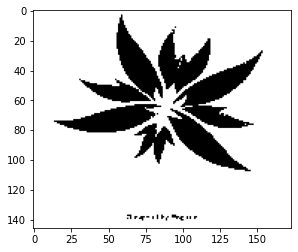

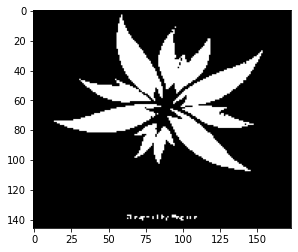

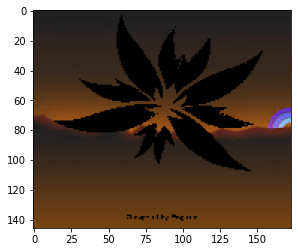

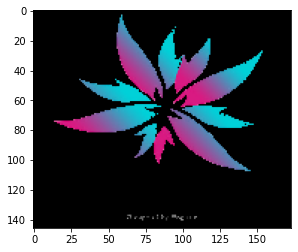

In [82]:
# creamos una mascara del logotipo
flor_gray = cv.cvtColor(flor, cv.COLOR_RGB2GRAY)
ret,mask = cv.threshold(flor_gray, 150,255, cv.THRESH_BINARY)
plt.figure(1)
plt.imshow(mask, cmap="gray")

# Creamos una mascara invertida
mask_inv = cv.bitwise_not(mask)
plt.figure(2)
plt.imshow(mask_inv, cmap="gray")

# tomamos el roi menos la mascara
img1_bg = cv.bitwise_and(roi,roi,mask = mask)
plt.figure(3)
plt.imshow(img1_bg)

#tomamos region de intere del logotipo
img2_bg = cv.bitwise_and(flor,flor,mask=mask_inv)
plt.figure(4)
plt.imshow(img2_bg)


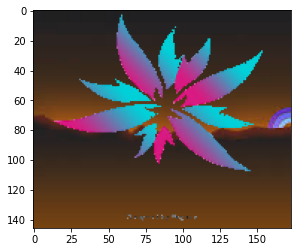

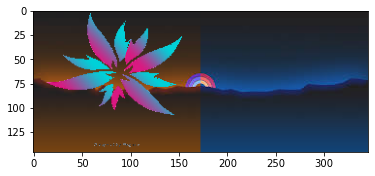

In [83]:
# Combinar las imagenes
img = img1_bg + img2_bg
plt.figure(1)
plt.imshow(img)

noche[0:fil,0:col]=img
plt.figure(2)
plt.imshow(noche)